In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [3]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

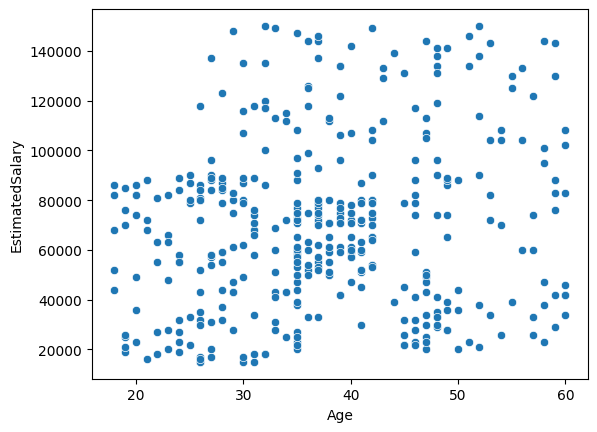

In [6]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6135 - loss: 2062.4355 - val_accuracy: 0.4000 - val_loss: 626.7028
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3826 - loss: 548.4564 - val_accuracy: 0.6000 - val_loss: 410.0573
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6188 - loss: 222.7457 - val_accuracy: 0.4000 - val_loss: 28.5509
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5487 - loss: 106.9041 - val_accuracy: 0.6000 - val_loss: 21.5320
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5975 - loss: 25.2375 - val_accuracy: 0.4000 - val_loss: 39.2845
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4829 - loss: 55.1219 - val_accuracy: 0.6000 - val_loss: 103.6015
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5766 - loss: 49.4477 - val_accuracy: 0.4000 - val_loss: 17.6620
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4937 - loss: 23.0879 - 

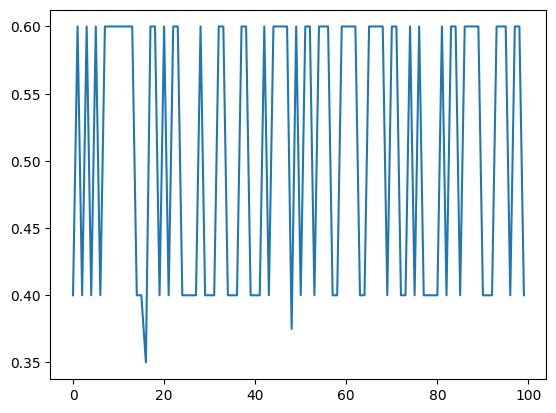

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_test_scaled

array([[-0.84826272,  0.40218125],
       [-1.62050759, -1.57325199],
       [-0.07601785, -0.48234109],
       [-0.84826272,  0.16630863],
       [ 1.56500249,  0.01888824],
       [ 0.88928823, -1.45531567],
       [-1.42744637,  0.37269718],
       [-0.94479333, -1.10150673],
       [ 0.21357397, -0.27595254],
       [-0.17254846,  1.66999662],
       [-1.33091576, -1.36686344],
       [-1.52397698, -1.24892713],
       [-0.5586709 ,  1.40463991],
       [ 0.69622701,  0.28424494],
       [-0.26907907, -0.30543662],
       [-0.46214029, -0.77718187],
       [-1.8135688 ,  0.01888824],
       [ 2.14418614, -0.80666595],
       [ 1.46847188,  0.07785639],
       [-1.13785454, -0.77718187],
       [-0.07601785,  0.25476086],
       [ 0.69622701, -0.71821372],
       [-0.75173211, -0.21698439],
       [-0.17254846, -1.07202266],
       [-1.23438515,  0.31372902],
       [ 0.69622701, -1.10150673],
       [ 0.69622701, -1.39634752],
       [ 0.21357397, -0.36440478],
       [ 0.5996964 ,

<Axes: >

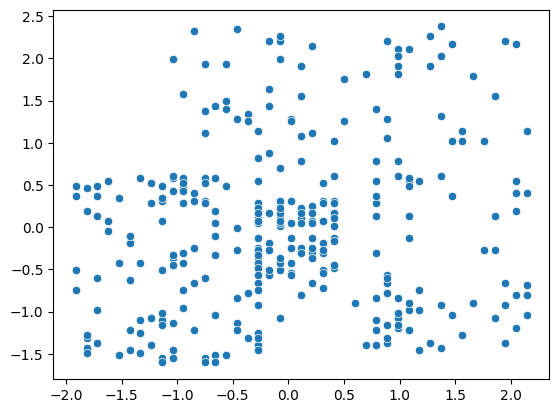

In [18]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [20]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4901 - loss: 703.7568 - val_accuracy: 0.5625 - val_loss: 0.6955
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4601 - loss: 71.0709 - val_accuracy: 0.5375 - val_loss: 0.6957
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4153 - loss: 59.3516 - val_accuracy: 0.5375 - val_loss: 0.6960
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4473 - loss: 70.4616 - val_accuracy: 0.5375 - val_loss: 0.6970
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5344 - loss: 50.5555 - val_accuracy: 0.5625 - val_loss: 0.6963
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6105 - loss: 60.6888 - val_accuracy: 0.5500 - val_loss: 0.6972
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5488 - loss: 87.4716 - val_accuracy: 0.5625 - val_loss: 0.6981
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5331 - loss: 115.1557 - val_accuracy:

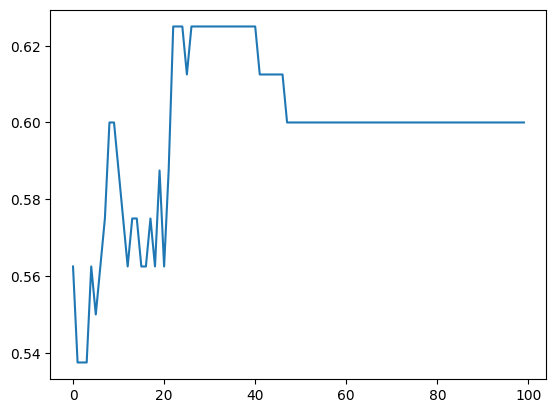

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])